<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/2_1_KMeans_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Tutorial

https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

- the k-means algorithm is computationally efficient compared to other clustering algorithms
- it belongs to the category of **prototype-based clustering**
    - each cluster is represented by a prototype, which can be
        - the **centroid** (average) of similar points with continuous features
        - the **medoid** (the most representative or most frequently occuring point) in the case of categorical features
- k-means is very good and identifying clusters with a spherical shape
- must specify the number of clusters, $k$, a priori (this is one of drawbacks of this clustering algorithm)
    - a bad choice for $k$ can result in poor clustering performance
- The example used here is a two-dimensional dataset for the purpose of visualization, but k-means clustering can be applied to higher dimensions

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import numpy as np

In [2]:
X, y = make_blobs(
    n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

In [3]:
X.shape, y.shape

((150, 2), (150,))

In [4]:
X[:5]

array([[2.60509732, 1.22529553],
       [0.5323772 , 3.31338909],
       [0.802314  , 4.38196181],
       [0.5285368 , 4.49723858],
       [2.61858548, 0.35769791]])

In [5]:
y[:5]

array([1, 0, 0, 0, 1])

In [6]:
np.unique(y)

array([0, 1, 2])

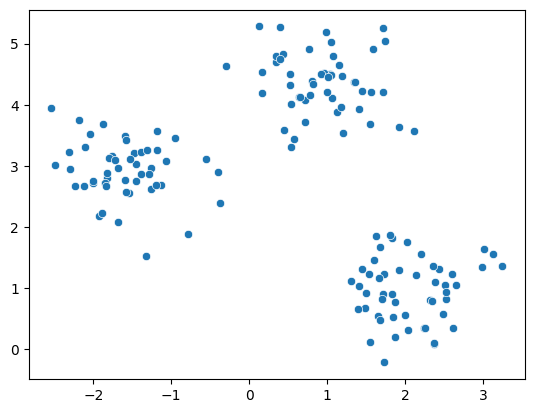

In [7]:
sns.scatterplot(x = X[:, 0], y=X[:, 1]);

- Note that in a real-world application, we do not have any ground truth category information about the clusters as we do here
    - If we did, it would fall into the category of supervised learning

## The k-means algorithm

1. Randomly pick $k$ centroids from the sample points as initial cluster centres
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step1.png'/>
2. Assign each sample to the nearest centroid
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step2.png'/>
3. Move the centroids to the center of the samples that were assigned to it
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step3.png'/>
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached
    - Next iteration of Step 2
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step3.png'/>
    - Next iteration of Step 3
    - <img src='https://raw.githubusercontent.com/PaulToronto/Hands-on-Maching-Learning-Book/main/images/step4_2.png'/>
        - When data points stop changing clusters and the centroids are no longer shifting, clustering is complete

### How do we measure similarity?

- the opposite of of distance
- the most commonly used difference is the **squared Euclidean distance**
- the formula given is for m-dimensional space

$$
d(x, y)^{2} = \sum_{j=1}^{m}\left(x_{j} - y_{j}\right)^{2} = \lVert x - y \rVert_{2}^{2}
$$

- based on this Euclidean distance metric, the k-means algorithm can be thought of as a simple optimization problem
    - an iterative approach for minimizing the within-cluster **Sum of Squared Errors (SSE)**, aka **cluster intertia**

$$
SSE = \sum_{i=1}^{n}\sum_{j=1}^{k} w^{\left(i, j\right)} \lVert x^{(i)} - u^{(j)} \rVert_{2}^{2}
$$

- $i$ is the sample index
- $j$ is the cluster index
- $u^{(j)}$ is the centroid for cluster j
- $w^{(i,j)}$ = 1 if the sample $x^{(i)}$ is in cluster $j$, otherwise it is 0

- note that if we are applying k-means to real-world data using a Euclidean distance metric, we want to make sure that the features are measured on the same scale by applying z-score standardization or min-max scaling if necessary

## K-means clustering using `scikit-learn`

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,      # run the algo 10 times independently, the winner is lowest SSE
    max_iter=300,   # max iterations for each single run
                    #. - stops early if it converges before max_iter is reached
    tol=1e-4,       # larger value for tol makes it more likely to converge
    random_state=0
)

km

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [10]:
km.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

In [11]:
y_km = km.predict(X) # there is also a `fit_predict()` method
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2], dtype=int32)

In [12]:
km.cluster_centers_ # learned

array([[-1.5947298 ,  2.92236966],
       [ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409]])

### Visualization

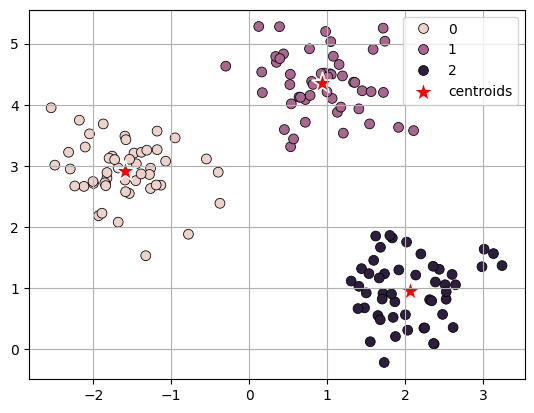

In [13]:
sns.scatterplot(x = X[:, 0],
                y = X[:, 1],
                s=50,
                edgecolor='k',
                hue=y_km)

sns.scatterplot(x = km.cluster_centers_[:, 0],
                y=km.cluster_centers_[:, 1],
                s=250,
                c='red',
                marker='*',
                label='centroids')

plt.grid();

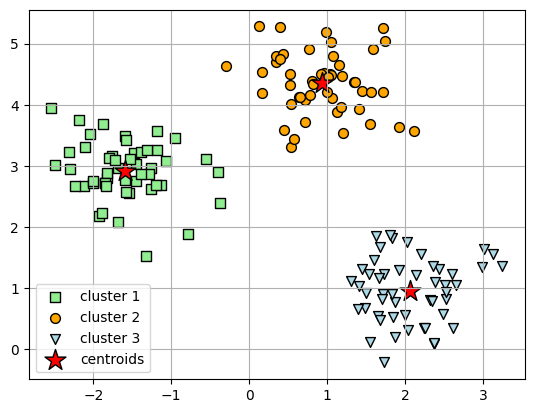

In [14]:
plt.scatter(
    X[y_km == 0, 0],
    X[y_km == 0, 1],
    s=50,
    c='lightgreen',
    marker='s',
    edgecolor='k',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0],
    X[y_km == 1, 1],
    s=50,
    c='orange',
    marker='o',
    edgecolor='k',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0],
    X[y_km == 2, 1],
    s=50,
    c='lightblue',
    marker='v',
    edgecolor='k',
    label='cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    c='red',
    marker='*',
    edgecolor='k',
    label='centroids'
)

plt.grid()
plt.legend(loc='lower left');

In [15]:
km.transform(X)[:5]

array([[4.52974707, 3.54769136, 0.60093662],
       [2.16274835, 1.11524564, 2.80741406],
       [2.80646188, 0.13356658, 3.6462783 ],
       [2.64357205, 0.42897581, 3.85535018],
       [4.93250108, 4.33744187, 0.81892682]])

In [16]:
km.transform(X).argmin(axis=1) == km.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [17]:
# Inertia is the sum of squared distance of
#. samples to their closest cluster center.
km.inertia_

72.47601670996696

## The Elbow Method

- used to determine the optimal $k$
- if $k$ increases, the within-cluster SSE (**distortion**) decreases
    - because the samples will be closer to the centroids they are assigned to
- the idea behind the elbow method is to identify a value of $k$ where the distortion begins to decrease most rapidly

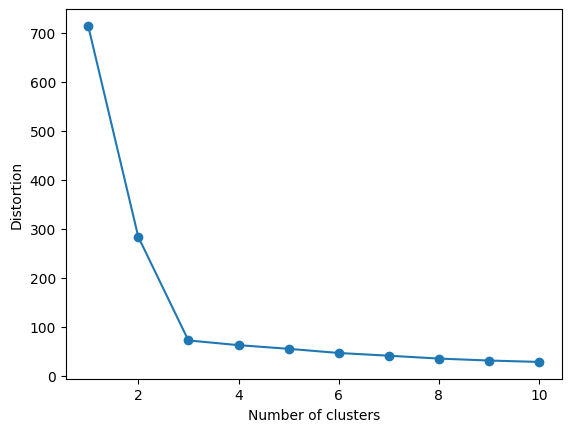

In [18]:
distortions = []

for i in range(1, 11):
    km = KMeans(
        n_clusters=i,
        init='random',
        n_init=10,
        max_iter=300,
        tol=1e-4,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

- From the visualization we can see that the elbow is located at $k = 3$, which is evidence that $k = 3$ is a good choice for this dataset.

For further study:

- **Silhouette plots**: another method used to select optimal $k$
- **k-means++**: a variant of k-means that improves clustering results through more clever seeding of the initial cluster centres
- there are also other clustering algorithms which don't require specifying the number of clusters upfront. They also don't assume spherical structures in our dataset:
    - hierarchical clustering
    - density-based clustering